#Dependências

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.multiarray import ndarray
import pandas as pd

/tmp/ipython-input-4150328498.py:4: DeprecationWarning: numpy.core.multiarray is deprecated and has been renamed to numpy._core.multiarray. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.ndarray.
  from numpy.core.multiarray import ndarray


# Configuração dos Gráficos

In [19]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

# Utils

In [20]:
def gera_parabola(x: ndarray) -> ndarray:
  ruido = np.random.randn(x.shape[0])/60
  return 2*((x-0.3)**2 -0.45*x+0.3) + ruido

In [21]:
def normalize(array):
  return (array - array.min()) / (array.max() - array.min())

#Dataset e Normalização

In [22]:
idades = np.array([18, 20, 25, 28, 30, 32, 40, 50, 55, 65, 70])
n_idades = normalize(idades)
n_valores = gera_parabola(n_idades)
valores = n_valores * 10000

print(n_idades)
print(n_valores)

[0.         0.03846154 0.13461538 0.19230769 0.23076923 0.26923077
 0.42307692 0.61538462 0.71153846 0.90384615 1.        ]
[0.75868469 0.72239144 0.52773952 0.4478441  0.39952505 0.35174118
 0.28255301 0.25004356 0.29732428 0.50685978 0.65969253]


Text(0.5, 1.0, 'Valor do seguro em função da idade')

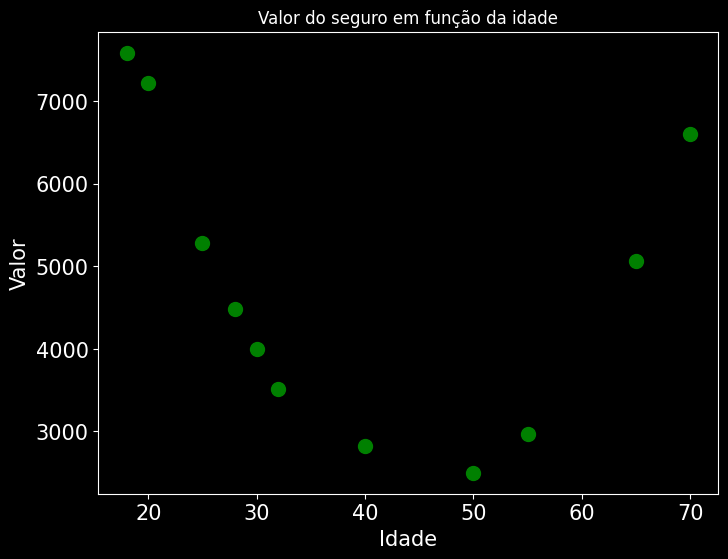

In [23]:
plt.scatter(idades,valores, s=100,color = "green")
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade', fontdict={'size':12})

Text(0.5, 1.0, 'Valor do seguro em função da idade (Normalizados)')

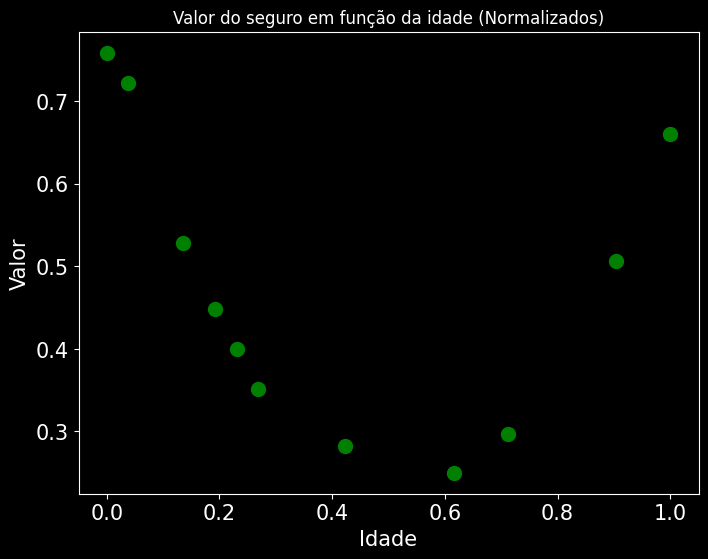

In [24]:
plt.scatter(n_idades,n_valores, s=100,color = "green")
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade (Normalizados)', fontdict={'size':12})

In [25]:
df = pd.DataFrame({'idade':n_idades, 'valor': n_valores})
df

,idade,valor
0,0.000000,0.758685
1,0.038462,0.722391
2,0.134615,0.527740
3,0.192308,0.447844
4,0.230769,0.399525
5,0.269231,0.351741
6,0.423077,0.282553
7,0.615385,0.250044
8,0.711538,0.297324
9,0.903846,0.506860


# Arquitetura do Modelo

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation="sigmoid", input_shape=(1,)),
    tf.keras.layers.Dense(2, activation="sigmoid"),
    tf.keras.layers.Dense(2, activation="sigmoid"),
    tf.keras.layers.Dense(2, activation="sigmoid"),
    tf.keras.layers.Dense(2, activation="sigmoid"),
    tf.keras.layers.Dense(1)
])


adam = tf.keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=adam, loss='mse')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

# Treinamento

In [27]:
log = model.fit(n_idades, n_valores, epochs=400)
losses = log.history['loss']

Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1195
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0307
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0503
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0728
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0641
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0434
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0302
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0318
Epoch 9/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0418
Epoch 10/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0481
Epoch 11/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0454
Epoch 12/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0374
Epoch 13/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0307
Epoch 14/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0293
Epoch 15/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0325
Epoch 16/400
1/1 ━━━━

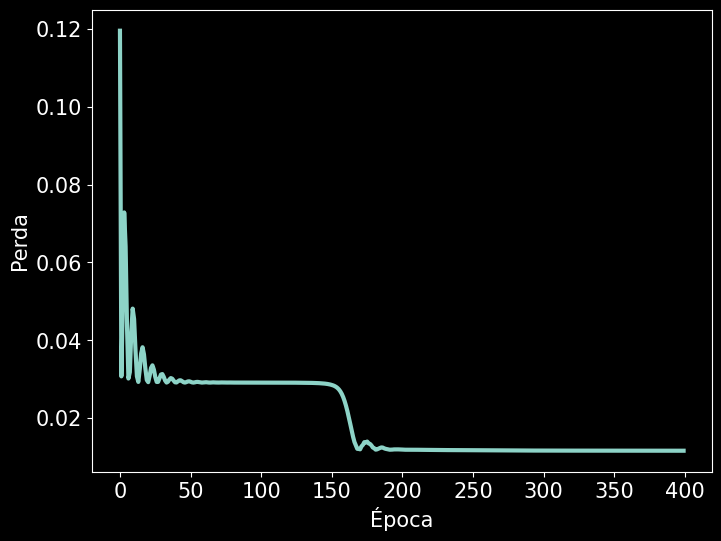

In [28]:
plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

#Teste

In [29]:
n_idades_teste = np.arange(0, 1.1, 0.1)

print(n_idades_teste)

n_valores_n1 = []
n_valores_n2 = []

weights, biases = model.layers[0].get_weights()

for i in n_idades_teste:
  n_valores_n1.append(i * weights[0][0] + biases[0])
  n_valores_n2.append(i * weights[0][1] + biases[1])

n_valores_n1 = np.array(n_valores_n1)
n_valores_n2 = np.array(n_valores_n2)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


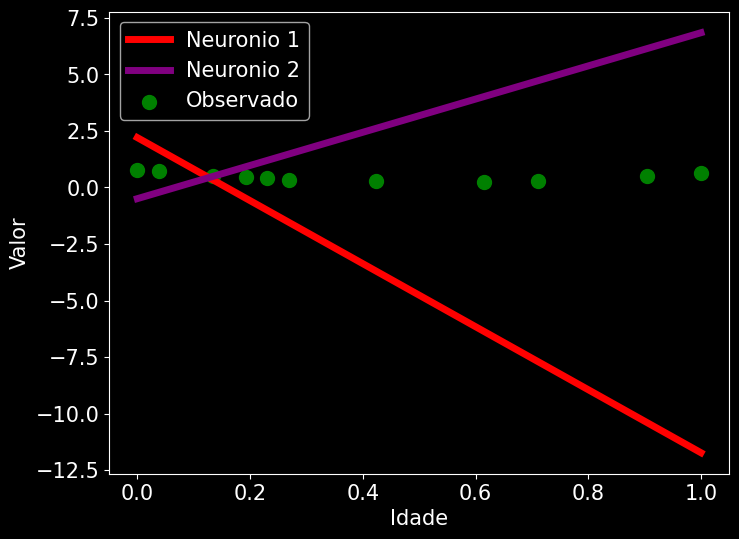

In [30]:
plt.plot(n_idades_teste, n_valores_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_n2, color="purple", lw=5, label = 'Neuronio 2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [31]:

n_valores_ativados_n1 = []
n_valores_ativados_n2 = []

for i in n_idades_teste:
  n_valores_l1 = model.layers[0](np.array([i])[:,None])

  n_valores_ativados_n1.append(n_valores_l1[0][0])
  n_valores_ativados_n2.append(n_valores_l1[0][1])

n_valores_ativados_n1 = np.array(n_valores_ativados_n1)
n_valores_ativados_n2 = np.array(n_valores_ativados_n2)



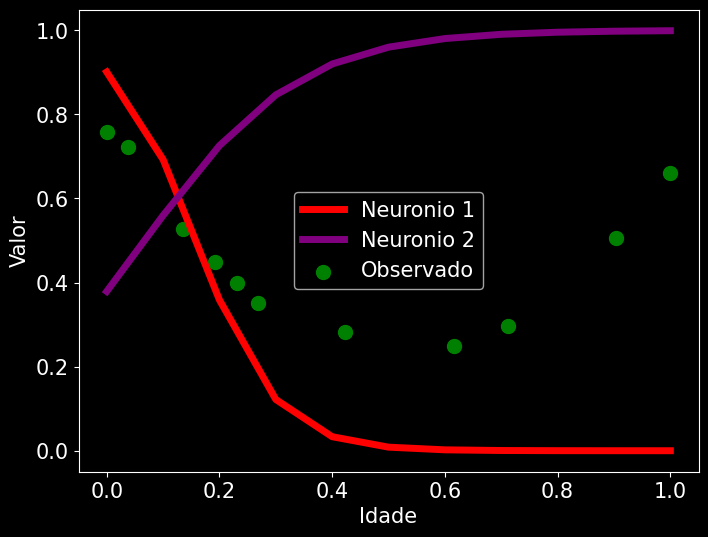

In [32]:
plt.plot(n_idades_teste, n_valores_ativados_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_ativados_n2, color="purple", lw=5, label = 'Neuronio 2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [33]:
n_valores_teste = []

n_valores_ativados_n1 = []
n_valores_ativados_n2 = []

for i in n_idades_teste:
  n_valores_teste.append(model.predict(np.array([i]))[0][0])

n_valores_teste = np.array(n_valores_teste)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


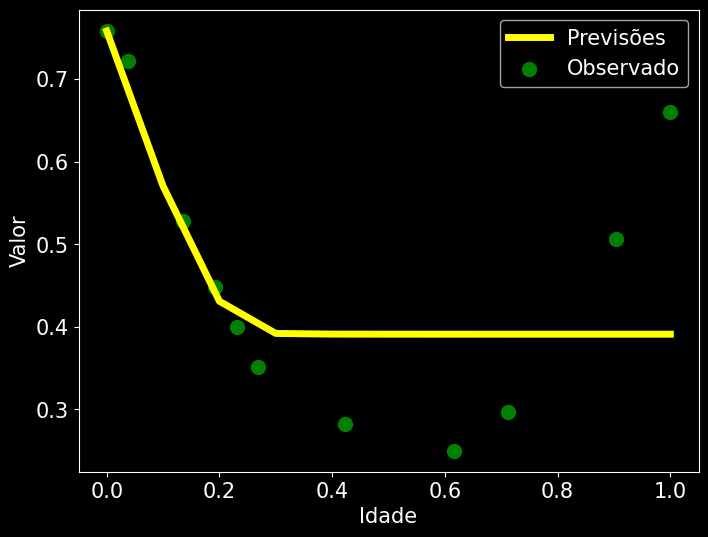

In [34]:
plt.plot(n_idades_teste, n_valores_teste, color="yellow", lw=5, label = 'Previsões')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()